<a href="https://colab.research.google.com/github/Sankalpmahanta/OIBSIP-Oasisinfobyte/blob/main/OIBSIP_TASK_3_UNEMPLOYMENT_ANALYSIS_WITH_PYTHON_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import calendar
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Connecting google drive -
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Reading the data using pandas -
df = pd.read_csv('/content/drive/MyDrive/OIBSIP/Unemployment_Rate_upto_11_2020.csv')
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.740
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.740
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.740
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.740
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855


In [4]:
# Checking the dimensions of the dataset -
df.shape

(267, 9)

In [5]:
# Viewing the first 10 rows -
df.head(10)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74
5,Andhra Pradesh,30-06-2020,M,3.31,19805400,47.41,South,15.9129,79.74
6,Andhra Pradesh,31-07-2020,M,8.34,15431615,38.91,South,15.9129,79.74
7,Andhra Pradesh,31-08-2020,M,6.96,15251776,37.83,South,15.9129,79.74
8,Andhra Pradesh,30-09-2020,M,6.40,15220312,37.47,South,15.9129,79.74
9,Andhra Pradesh,31-10-2020,M,6.59,15157557,37.34,South,15.9129,79.74


In [6]:
# Viewing the last 10 rows -
df.tail(10)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
257,West Bengal,31-01-2020,M,6.94,35820789,47.35,East,22.9868,87.855
258,West Bengal,29-02-2020,M,4.92,36964178,47.74,East,22.9868,87.855
259,West Bengal,31-03-2020,M,6.92,35903917,47.27,East,22.9868,87.855
260,West Bengal,30-04-2020,M,17.41,26938836,39.90,East,22.9868,87.855
261,West Bengal,31-05-2020,M,17.41,28356675,41.92,East,22.9868,87.855
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855
266,West Bengal,31-10-2020,M,9.98,33962549,45.63,East,22.9868,87.855


In [7]:
# Making a concise summary of the dataset--
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [8]:
#Checking for nullvalues :
df.isna().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

# *This dataset contains no null values ie all the columns have values.*

# **Formatting the columns and their data types-**

In [9]:
# Renaming the columns for a better understanding -
df.columns = ['States', 'Date', 'Frequency', 'Estimated Unemployment Rate', 'Estimated Employed',
              'Estimated Labour Participation Rate', 'Region', 'longitude', 'latitude']

df.head(2)

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74


In [10]:
# Converting 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], dayfirst = True)

# ***By setting dayfirst=True, we are instructing the function to interpret the date string with the understanding that the day part comes before the month.***

In [11]:
# Converting 'Frequency' and 'Region' columns to categorical data type -
df['Frequency'] = df['Frequency'].astype('category')
df['Region'] = df['Region'].astype('category')

# Extracting month from 'Date' and creating a 'Month' column -
df['Month'] = df['Date'].dt.month

# Converting 'Month' to integer format -
df['Month int'] = df['Month'].apply(lambda month: int(month))

# Mapping integer month values to abbreviated month names -
df['Month name'] = df['Month int'].apply(lambda x: calendar.month_abbr[x])

# Dropping the original 'Month' column -
df.drop(columns = 'Month', inplace = True)

In [12]:
df.head()

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,longitude,latitude,Month int,Month name
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1,Jan
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2,Feb
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3,Mar
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74,4,Apr
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74,5,May


In [13]:
# Statistical analysis of the data -
df.describe()

,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,longitude,latitude,Month int
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425,5.535581
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738,2.870915
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400,1.000000
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600,3.000000
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300,6.000000
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900,8.000000
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600,10.000000


In [14]:
# Statistical analysis grouped by different regions -
region_stats = df.groupby(['Region'])[['Estimated Unemployment Rate', 'Estimated Employed',
                                       'Estimated Labour Participation Rate']].mean().reset_index()

region_stats

,Region,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate
0,East,13.916000,1.960237e+07,40.108750
1,North,15.889620,1.307249e+07,38.702658
2,Northeast,10.950263,3.617106e+06,52.055263
3,South,10.454667,1.404059e+07,40.436167
4,West,8.239000,1.862351e+07,41.257000


# **Creating a Heat Map**

<Axes: >

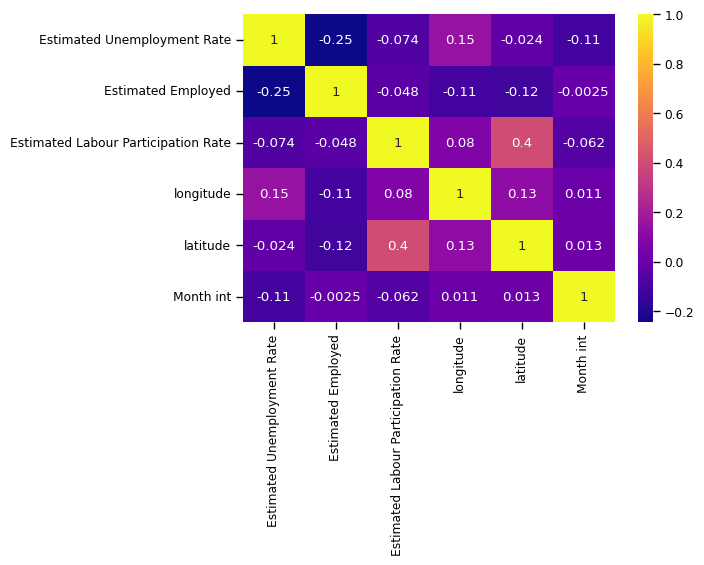

In [15]:
# Selecting specific columns from the DataFrame
map = df[['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate', 'longitude', 'latitude', 'Month int']]

# Calculating the correlation matrix for the selected columns
map = map.corr()

# Creating a figure for the heatmap with a specific size
plt.figure(figsize=(6, 4))

# Setting the context for the seaborn plot, adjusting the font scale
sns.set_context('paper', font_scale=1)

# Creating a heatmap using seaborn, with annotations and a specific color map
sns.heatmap(data=map, annot=True, cmap='plasma')

# **Box plot : Unemployment rate per states**

In [16]:
fig = px.box(df, x = 'States',
             y = 'Estimated Unemployment Rate',
             color = 'States',
             title = 'Unemployment rate per states',
             template = 'seaborn')

# Updating the x-axis category order to be in descending order
fig.update_layout(xaxis = {'categoryorder' : 'total descending'})
fig.show()